t= 2.368004535147392 c; кількість вікон у звуковому файлі N = 12
v0=656.8 Гц, A0=307.0
v1=328.4 Гц, A1=274.4
v2=985.3 Гц, A2=44.9


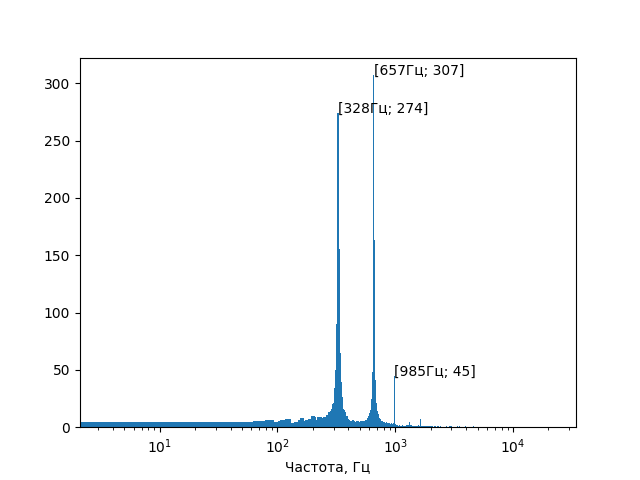

In [10]:
from random import randint
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import sys
import wave
import math

RATE = 44100
CHUNK = 1024*8
filename='струна_E4.wav'
audio_file = wave.open(filename)
CHANNELS2 = audio_file.getnchannels()

znach1 = wave.open(filename,"r")
znach1_16 = znach1.readframes(-1)
# print(znach1_16[:20],len(znach1_16))

znach2 = np.frombuffer(znach1_16, dtype='int16')
if CHANNELS2==2:
    znach2=znach2[::2]
print('t=',len(znach2)/44100,'c; кількість вікон у звуковому файлі N =',len(znach2)//CHUNK)

wind=5 #номер вікна, яке аналізуємо
yf = fft(znach2[wind*CHUNK:(wind+1)*CHUNK])
yf2=[]
for k in range(len(yf)):
    yf2.append(abs(yf[k])/(0.5 * CHUNK))
xf= np.linspace(0, RATE, CHUNK)

%matplotlib ipympl
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
ax.set_xscale('log')
ax.bar(xf[0:len(xf)//2], yf2[0:len(yf2)//2], width=15)
ax.set_xlabel('Частота, Гц')

#пошук гармонік з найбільшими амплітудами
yf1=[]
for k in range(1,len(yf2)//2-1):
    if yf2[k]>yf2[k-1] and yf2[k]>yf2[k+1]:
        yf1.append([yf2[k],xf[k]])
yf1=sorted(yf1, key=lambda yf1: yf1[0], reverse=True)
n=3 
for k in range(n):
    new_x=yf1[k][1]
    new_y=yf1[k][0]
    s1='['+str(round(new_x))+'Гц'+'; '+str(round(new_y))+']'
    ax.annotate(s1, (new_x,new_y))
    print('v'+str(k)+'='+str(round(new_x,1))+' Гц,','A'+str(k)+'='+str(round(new_y,1)))

fig.savefig('AChH.png', dpi = 1000)